Stock Prediciton

Importing Libraries and Defining the Function

In [1]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def get_intraday_data(symbol, interval, api_key):
    base_url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo"
    function = "TIME_SERIES_INTRADAY"
    datatype = "csv"
    url = f"{base_url}?function={function}&symbol={symbol}&interval={interval}&apikey={api_key}&datatype={datatype}"
    data = pd.read_csv(url)
    return data


Fetching Data

In [3]:
api_key = "03K0SCFUDF718MIY"
tesla_data = get_intraday_data("TSLA", "5min", api_key)


Preprocessing Data

In [4]:
tesla_data['timestamp'] = pd.to_datetime(tesla_data['timestamp'])
tesla_data['time'] = tesla_data['timestamp'].apply(lambda x: x.hour * 60 + x.minute)
tesla_data = tesla_data[['time', 'open', 'high', 'low', 'close', 'volume']]


 Displaying Data

In [5]:
# Print the first 5 rows of the data
print(tesla_data.head())

# Print the last 5 rows of the data
print(tesla_data.tail())


   time    open    high     low   close  volume
0  1195  199.49  199.60  199.48  199.52   24042
1  1190  199.55  199.57  199.45  199.49    6528
2  1185  199.59  199.62  199.48  199.55   20452
3  1180  199.46  199.64  199.41  199.58    8771
4  1175  199.37  199.50  199.37  199.50    6660
    time     open    high     low    close   volume
95   720  202.310  202.94  202.17  202.240  1347806
96   715  202.205  202.60  202.16  202.291   970403
97   710  201.640  202.38  201.60  202.210  1250201
98   705  202.579  202.59  201.60  201.638  1406169
99   700  202.055  202.65  201.89  202.550  1396990


In [6]:
print(tesla_data)

    time     open    high     low    close   volume
0   1195  199.490  199.60  199.48  199.520    24042
1   1190  199.550  199.57  199.45  199.490     6528
2   1185  199.590  199.62  199.48  199.550    20452
3   1180  199.460  199.64  199.41  199.580     8771
4   1175  199.370  199.50  199.37  199.500     6660
..   ...      ...     ...     ...      ...      ...
95   720  202.310  202.94  202.17  202.240  1347806
96   715  202.205  202.60  202.16  202.291   970403
97   710  201.640  202.38  201.60  202.210  1250201
98   705  202.579  202.59  201.60  201.638  1406169
99   700  202.055  202.65  201.89  202.550  1396990

[100 rows x 6 columns]


Saving Data to CSV

In [7]:
# Save the data to a new CSV file
tesla_data.to_csv('tesla_intraday_data.csv', index=False)

Plotting the Data

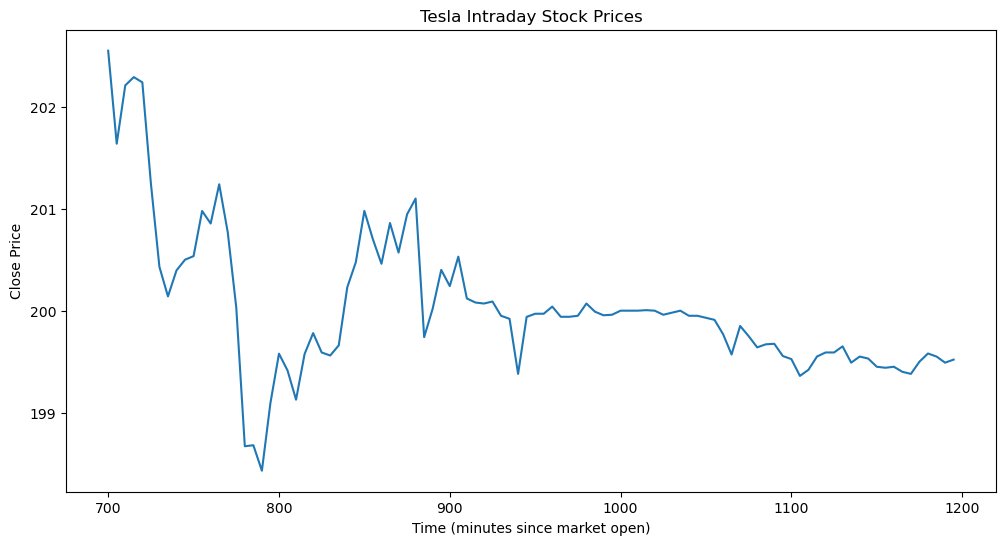

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tesla_data['time'], tesla_data['close'])
plt.xlabel('Time (minutes since market open)')
plt.ylabel('Close Price')
plt.title('Tesla Intraday Stock Prices')
plt.show()


In [9]:
# Define features and target
X = tesla_data[['time', 'open', 'high', 'low', 'volume']]
y = tesla_data['close']

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Training models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}")
print(f"Linear Regression R2 Score: {r2_lin}")

Linear Regression MSE: 0.12494808833967772
Linear Regression R2 Score: 0.33686619136390084


In [12]:
# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

Random Forest MSE: 0.14248693486501424
Random Forest R2 Score: 0.24378271765910875


In [13]:
# Gradient Boosting
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R2 Score: {r2_gb}")

Gradient Boosting MSE: 0.1266554435242963
Gradient Boosting R2 Score: 0.32780478865405904


In [14]:
# AdaBoost
ab_reg = AdaBoostRegressor(random_state=42)
ab_reg.fit(X_train, y_train)
y_pred_ab = ab_reg.predict(X_test)
mse_ab = mean_squared_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)
print(f"AdaBoost MSE: {mse_ab}")
print(f"AdaBoost R2 Score: {r2_ab}")

AdaBoost MSE: 0.11503220600037545
AdaBoost R2 Score: 0.3894925012900916


In [15]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (MSE): {-grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best score (MSE): 0.044794474408834994
